In [117]:
import sys
sys.path.append( "/home/peer/PycharmProjects/neslearng")

In [118]:
import pandas
from hsa.ba.analyse_ram import ram_from_movie
# from hsa.ba.rewards import time_left, make_delta_potential
import hsa.ba.rewards as rewards
import importlib
import matplotlib.pyplot as plt
import numpy as np

In [119]:
importlib.reload(rewards)

<module 'hsa.ba.rewards' from '/home/peer/PycharmProjects/neslearng/hsa/ba/rewards.py'>

In [120]:
%matplotlib notebook

In [4]:
movies = {}

In [5]:
movies[5] = pandas.DataFrame(ram_from_movie("../../movies/5_1-1_without-shortcut.fm2"))

In [6]:
movies[6] = pandas.DataFrame(ram_from_movie("../../movies/6_1-1_with_shortcut.fm2"))

In [ ]:
# /home/peer/PycharmProjects/neslearng/movies/7_1-1_death_and_checkpoint_no_shortcut.fm2
movies[7] = pandas.DataFrame(ram_from_movie("../../movies/7_1-1_death_and_checkpoint_no_shortcut.fm2"))

In [24]:
# /home/peer/PycharmProjects/neslearng/movies/8_1-1_death_and_shortcut.fm2
movies[8] = pandas.DataFrame(ram_from_movie("../../movies/8_1-1_death_and_shortcut.fm2"))

In [ ]:
# /home/peer/PycharmProjects/neslearng/movies/9_1-1_death_in_shortcut.fm2
movies[9] = pandas.DataFrame(ram_from_movie("../../movies/9_1-1_death_in_shortcut.fm2"))

In [ ]:
# /home/peer/PycharmProjects/neslearng/movies/10_1-1_slow_with_powerup.fm2
movies[10] = pandas.DataFrame(ram_from_movie("../../movies/10_1-1_slow_with_powerup.fm2"))

In [ ]:
movies[11] = pandas.DataFrame(ram_from_movie("../../movies/11_1-1_small_walking.fm2"))

In [22]:
movies[12] = pandas.DataFrame(ram_from_movie("../../movies/12_1-1_dieing_to_first_gumba.fm2"))

In [23]:
movies[13] = pandas.DataFrame(ram_from_movie("../../movies/13_1-1_dieing_to_gumbas.fm2"))

In [3]:
movie_paths = !ls ../../movies/*.fm2

In [10]:
[path[13:15] for path in movie_paths]

['10', '11', '12', '13', '5_', '6_', '7_', '8_', '9_']

In [20]:
for movie_path in movie_paths:
    try:
        index = int(movie_path[13:15])
    except: 
        index = int(movie_path[13])
    movies[index] = pandas.DataFrame(ram_from_movie(movie_path))


In [ ]:
delta_potential = rewards.make_delta_potential()

def reward_func(ram):
    return {"delta_potential": delta_potential(ram),
            "time_left": rewards.reward_for_time_left(ram)/10#,
            #"current_screen": ram[0x071A],
            #"playerstate": ram[0x000E]
           }

def rewards_from_frame(df):
    return pandas.DataFrame.from_dict((reward_func(ram) for index, ram in df.iterrows()))

In [ ]:
rewards_from_frame(movies[5]).plot()

In [ ]:
rewards_from_frame(movies[7]).plot()

Note the behavior for checkpoints.
Going down to the start of the level, and then going back up for being teleport forward to the middle

## Main reward function

In [ ]:
def main_reward_series(df):
    main_reward = rewards.make_main_reward()
    return pandas.Series((main_reward(ram) for index, ram in df.iterrows()))

In [ ]:
main_reward_series(movies[6]).plot()

In [ ]:
rewards_from_frame(movies[10])["time_left"].max()

## Fine x Posistion Potential

In [7]:
def fine_x(df):
    x_ready = rewards.with_residual(rewards.fine_x_pos,None)
    return pandas.DataFrame((x_ready(row[1])for row in df.iterrows()))
    #return df.apply(lambda row: x_ready(row)[0],axis=1)

In [52]:
def fine_x_resets(df):
    return df.apply(lambda row: rewards.fine_x_pos(row)[1],axis=1)

In [56]:
def delta_fine_x(df):
    delta_x = rewards.make_delta_fine_x_pos()
    return df.apply(delta_x,axis=1)

<IPython.core.display.Javascript object>


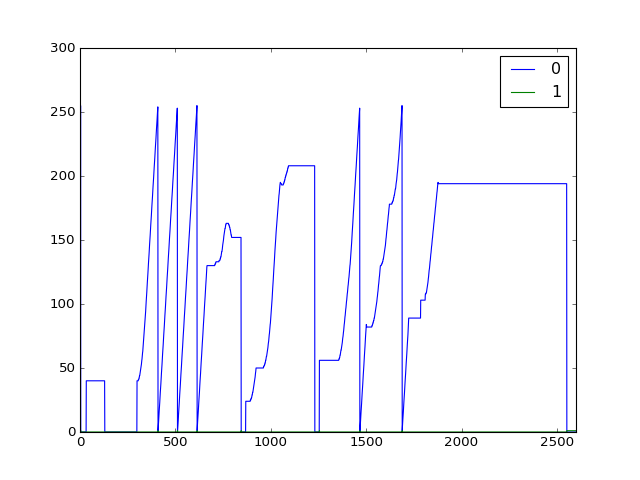

In [8]:
fine_x(movies[6]).plot()

In [110]:
delta_fine_x(movies[6]).plot()

## actual fine main reward

In [142]:
def fine_reward_series(df):
    main_reward = rewards.make_fine_potential(kind="delta")
    return pandas.Series((main_reward(ram) for index, ram in df.iterrows()))

In [9]:
def fine_reward_details(df):
    main_reward = rewards.make_fine_potential(kind="all")
    return pandas.DataFrame.from_records((main_reward(ram) for index, ram in df.iterrows()))

In [137]:
fine_reward_series(movies[5]).plot()

In [141]:
fine_reward_series(movies[6])[10:].plot()

<IPython.core.display.Javascript object>


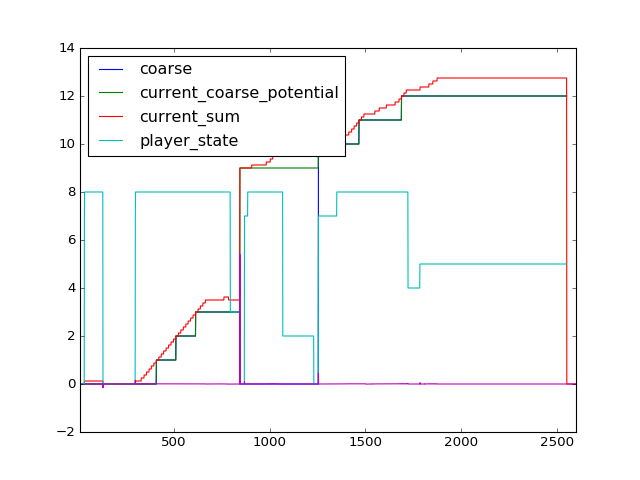

In [10]:
fine_reward_details(movies[6])[10:].plot()

In [126]:
movie_6_details = fine_reward_details(movies[6])

In [127]:
movie_6_details.iloc[1225]

coarse                             0
current_coarse_potential           9
current_sum                     9.75
player_state                       2
state                       going up
Name: 1225, dtype: object

In [128]:
movie_6_details.iloc[1231]

coarse                             0
current_coarse_potential           9
current_sum                        9
player_state                       0
state                       going up
Name: 1231, dtype: object

In [134]:
fine_reward_series(movies[12])[40:].plot()

In [135]:
fine_reward_series(movies[13])[40:].plot()

## Finer main reward

In [12]:
def finer_reward_series(df):
    main_reward = rewards.make_finer_potential()
    return pandas.Series((main_reward(ram) for index, ram in df.iterrows()))

<IPython.core.display.Javascript object>


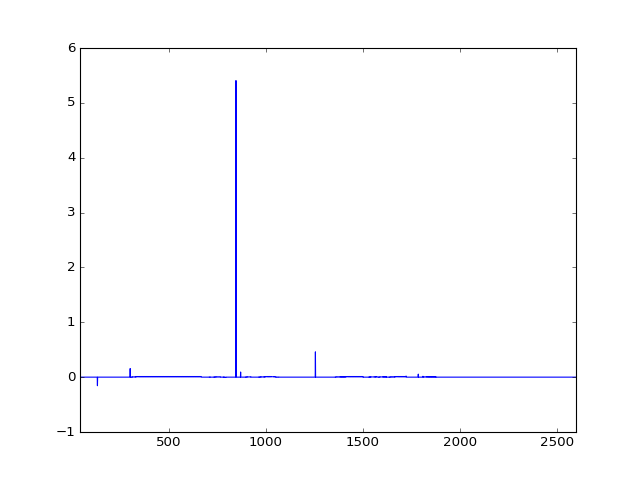

In [14]:
finer_reward_series(movies[6])[40:].plot()

## CHA EVAL Plot potential for shorcut and no shortcut

In [33]:
def finer_reward_details(df):
    main_reward = rewards.make_fine_potential(kind="all",subsections_selector=1)
    return pandas.DataFrame.from_records((main_reward(ram) for index, ram in df.iterrows()))

<IPython.core.display.Javascript object>


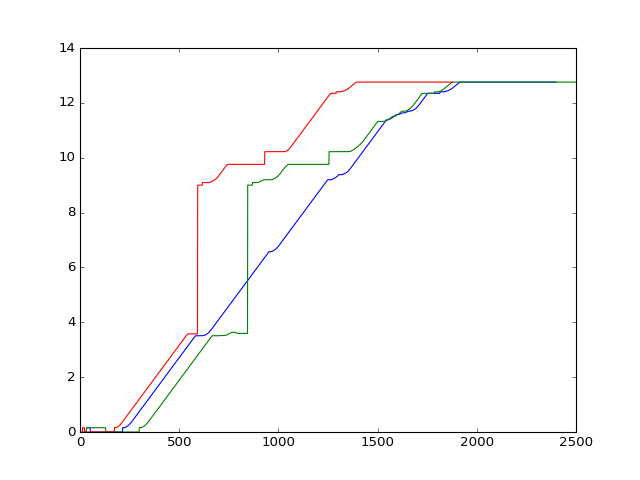

In [48]:
finer_reward_details(movies[5])[("current_sum")][20:2400].plot(x='Zeit in Frames', y="Potential von without_shortcut.fm2")
finer_reward_details(movies[6])[("current_sum")][20:2500].plot(x='Zeit in Frames')
finer_reward_details(record_movie[20:1900])[("current_sum")].plot(x='Zeit in Frames')
plt.savefig("potential.pdf")

<IPython.core.display.Javascript object>


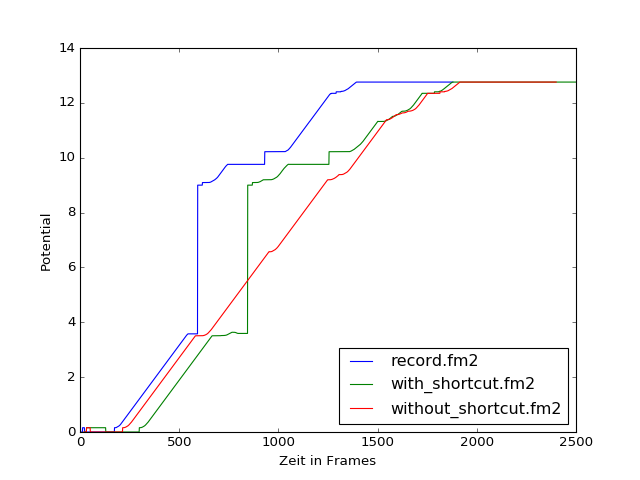

In [57]:
potentials_frame = pandas.DataFrame.from_dict(
    {
        "without_shortcut.fm2": finer_reward_details(movies[5])[("current_sum")][20:2400],
        "with_shortcut.fm2": finer_reward_details(movies[6])[("current_sum")][20:2500],
        "record.fm2": finer_reward_details(record_movie[20:1900])[("current_sum")]
    }
) 
ax = potentials_frame.plot(legend="ABC")
ax.set(xlabel="Zeit in Frames", ylabel="Potential")
plt.savefig("potential.pdf")

<IPython.core.display.Javascript object>


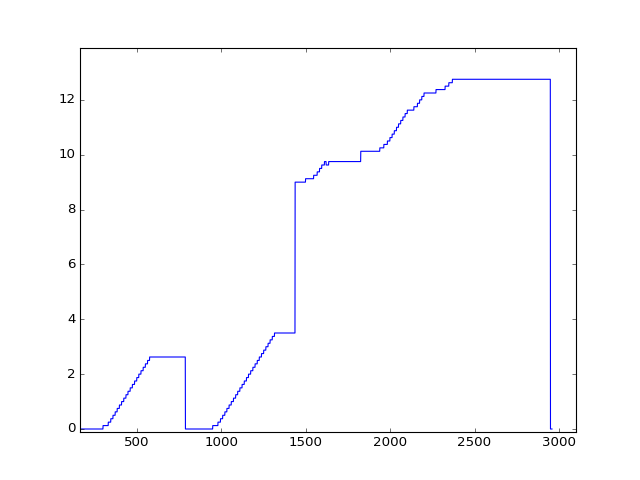

In [25]:
fine_reward_details(movies[8])[("current_sum")][20:].plot()

In [35]:
record_movie = pandas.DataFrame(ram_from_movie("../../bin_deps/fceux/movies/happylee-supermariobros,warped.fm2"))

<IPython.core.display.Javascript object>


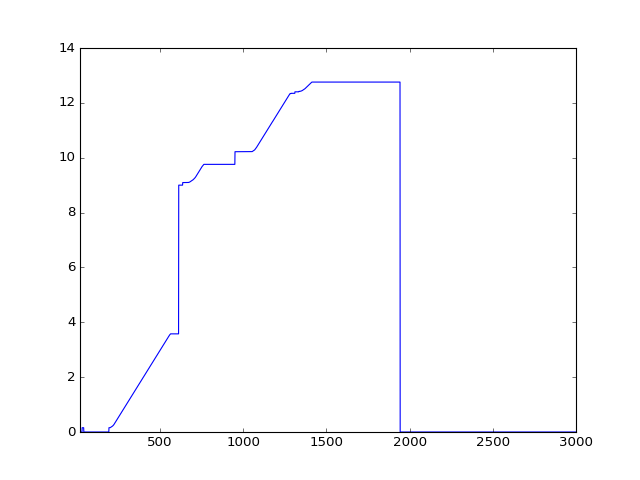

In [40]:
finer_reward_details(record_movie)[("current_sum")][20:3000].plot()

## BA EVAL ehrebrav cumsum

In [60]:
from hsa.nes_python_input import py_to_nes_wrapper
from hsa.visualization.parse_fm2 import parse_fm2
from nes_python_interface.nes_python_interface import NESInterface
import hsa.machine_constants
import pandas



def erenbrav_from_movie(movie_path):
    nes = NESInterface(hsa.machine_constants.mario_rom_location, eb_compatible=False, auto_render_period=1)
    with open(movie_path) as movie_file:
        for combi in parse_fm2(movie_file):
            reward = nes.act(py_to_nes_wrapper(combi))
            yield reward

In [65]:
brav_5 = pandas.Series(erenbrav_from_movie("../../movies/5_1-1_without-shortcut.fm2"))

In [66]:
brav_6 = pandas.Series(erenbrav_from_movie("../../movies/6_1-1_with_shortcut.fm2"))

In [68]:
brav_lee = pandas.Series(erenbrav_from_movie("../../bin_deps/fceux/movies/happylee-supermariobros,warped.fm2"))

In [69]:
erenbrav_frame = pandas.DataFrame.from_dict(
    {
        "without_shortcut.fm2": brav_5[20:2400].cumsum(),
        "with_shortcut.fm2": brav_6[20:2500].cumsum(),
        "record.fm2": brav_lee[20:1900].cumsum()
    }
) 

<IPython.core.display.Javascript object>


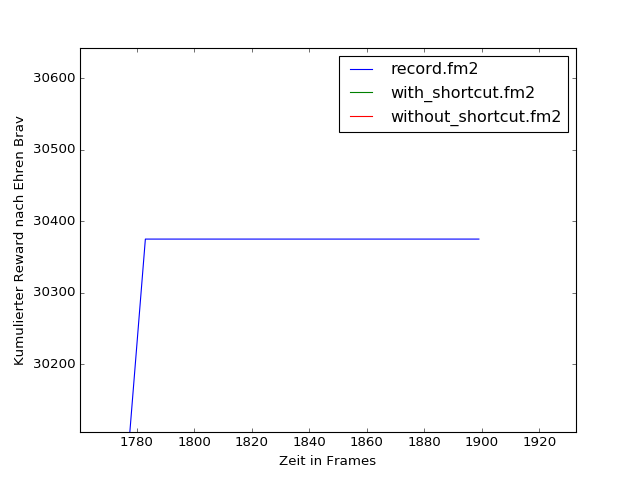

In [114]:
eax = erenbrav_frame.plot()
eax.set(xlabel="Zeit in Frames", ylabel="Kumulierter Reward nach Ehren Brav")
plt.savefig("brav_reward.pdf")

In [115]:
erenbrav_frame.max()

record.fm2              30375.0
with_shortcut.fm2       35705.0
without_shortcut.fm2    33325.0
dtype: float64

## BA EVAL time left cumsum

In [74]:
def time_left_reward_series(df):
    return pandas.Series((rewards.reward_for_time_left(ram) for index, ram in df.iterrows()))

In [86]:
time_left_reward_series(record_movie[20:1300])[1260:1300]

1260      0
1261      0
1262      0
1263      0
1264      0
1265      0
1266      0
1267    370
1268    370
1269    370
1270    370
1271    370
1272    370
1273    370
1274    370
1275    370
1276    370
1277    370
1278    370
1279    370
dtype: int64

<IPython.core.display.Javascript object>


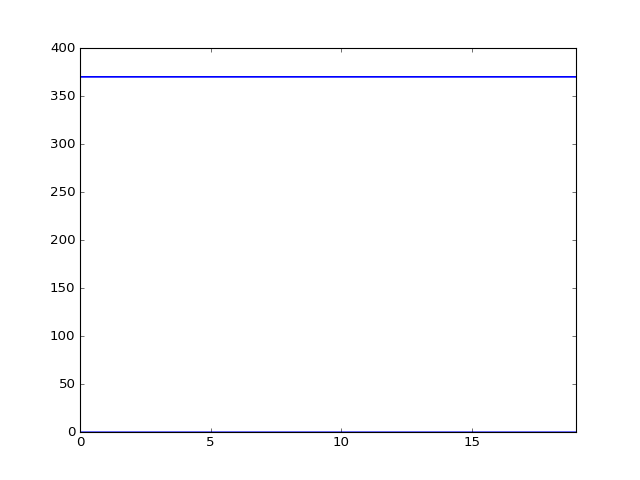

In [121]:
time_left_reward_series(record_movie[0:1300])[:1288].append(pandas.Series([0]*20)).cumsum().plot()

<IPython.core.display.Javascript object>


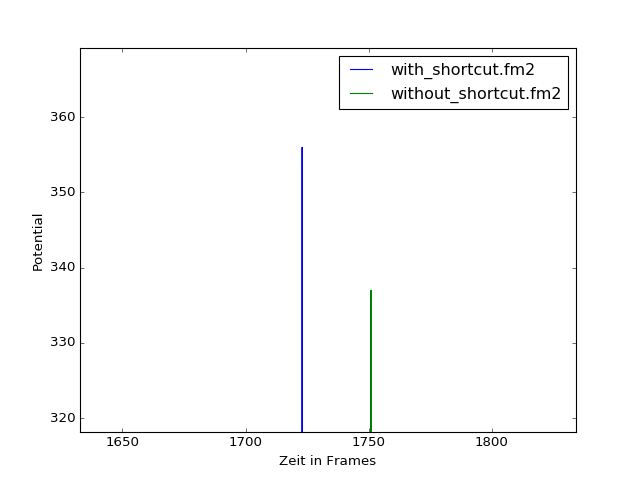

In [111]:
potentials_frame = pandas.DataFrame.from_dict(
    {
        "without_shortcut.fm2": time_left_reward_series(movies[5])[:2400],
        "with_shortcut.fm2": time_left_reward_series(movies[6])[:2500],
    }
) 
ax = potentials_frame.plot(legend="ABC")
ax.set(xlabel="Zeit in Frames", ylabel="Potential")
plt.savefig("potential.pdf")

In [112]:
time_left_reward_series(movies[5]).sum()


337

In [113]:
time_left_reward_series(movies[6]).sum()

356